# 07.01 - Implementing SVM with Scikit-Learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris(as_frame=True)
df = data.frame.copy()
# df['species'] = data.target

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [5]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [6]:
print(X_test.shape, y_test.shape)

(30, 4) (30,)


## Predictions

In [7]:
y_hat = model.predict(X_test)

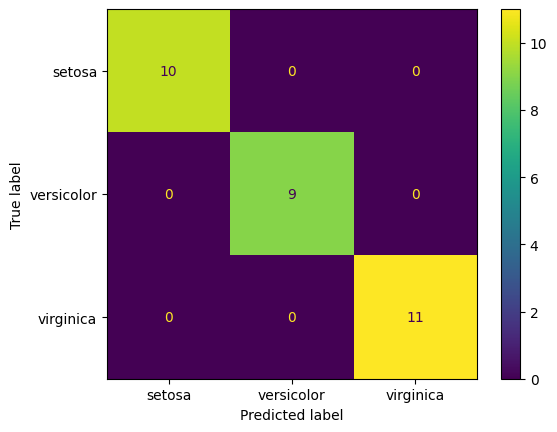

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat, average='weighted')
recall = recall_score(y_test, y_hat, average='weighted')
f1 = f1_score(y_test, y_hat, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


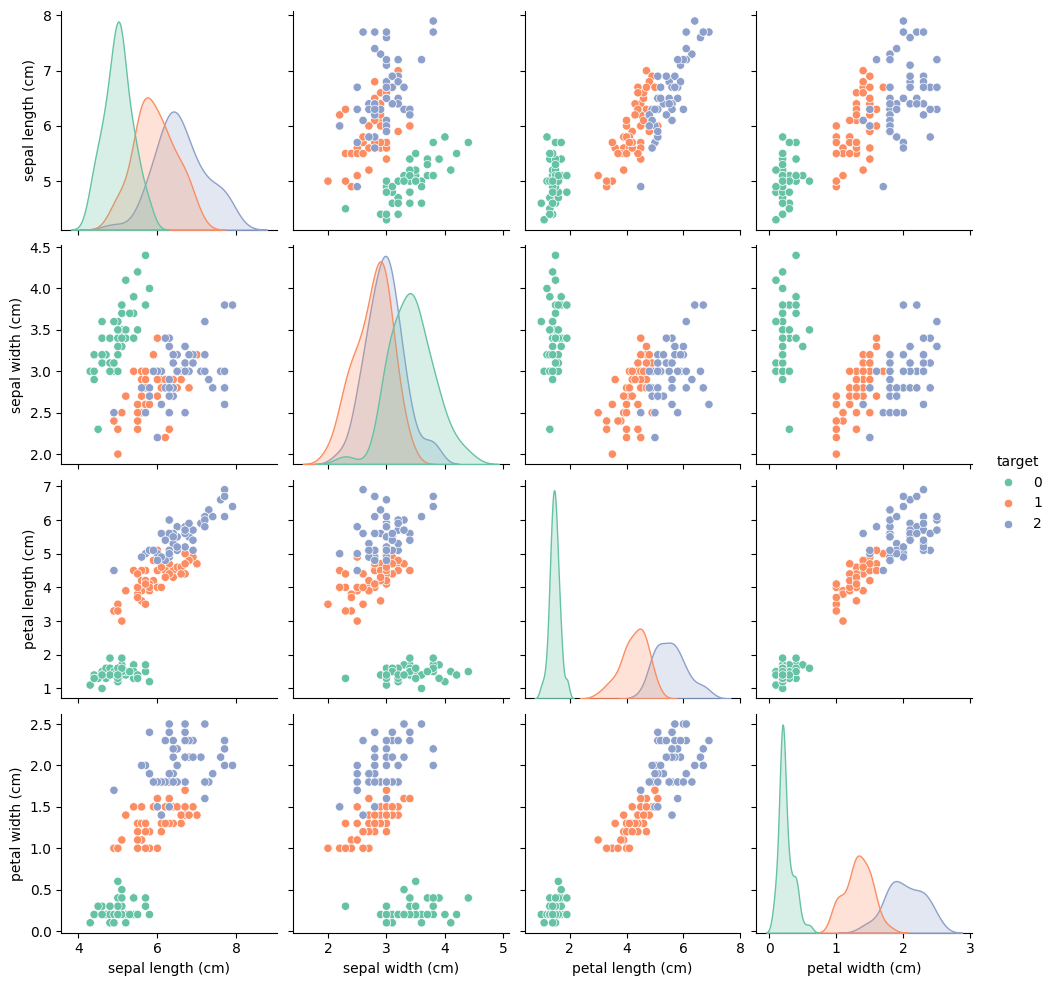

In [10]:
import seaborn as sns
sns.pairplot(df, hue='target', palette='Set2')
# sns.pairplot(df, hue = 'species')

# 07.02. SVM with Non-linear Kernels

In [11]:
from sklearn.datasets import make_moons
import pandas as pd

X, y = make_moons(n_samples=500, noise=0.4, random_state=42)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.svm import SVC

# Non-linear RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


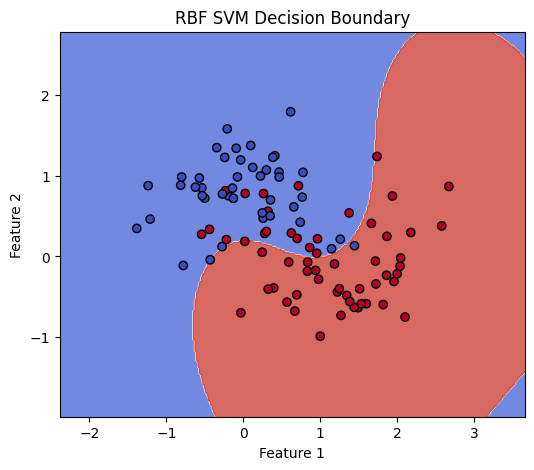

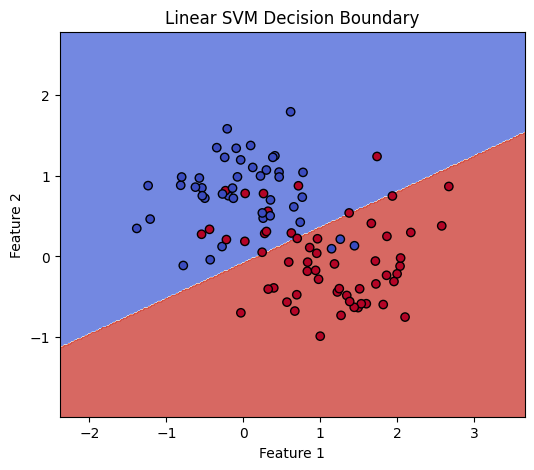

In [15]:
plot_decision_boundary(svm_rbf, X_test, y_test, "RBF SVM Decision Boundary")
plot_decision_boundary(svm_linear, X_test, y_test, "Linear SVM Decision Boundary")


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_metrics(model, X_test, y_test, label):
    y_pred = model.predict(X_test)
    print(f"\n{label} Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.2f}")

print_metrics(svm_rbf, X_test, y_test, "RBF SVM")
print_metrics(svm_linear, X_test, y_test, "Linear SVM")



RBF SVM Metrics:
Accuracy: 0.83
Precision: 0.98
Recall: 0.72
F1-score: 0.83

Linear SVM Metrics:
Accuracy: 0.82
Precision: 0.93
Recall: 0.74
F1-score: 0.82


In [17]:
param_grid = {
    'C': [0.1, 0.25, 0.5, 0.75, 1, 6.5, 7.5, 8.5, 10, 100],
    'gamma': [0.01, 0.1, 0.25, 0.5, 0.6, 0.65, 0.75, 1, 5, 10],
    'kernel': ['rbf']
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Test Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Test Recall: {recall_score(y_test, y_pred):.2f}")
print(f"Test F1-score: {f1_score(y_test, y_pred):.2f}")


Best parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}
Best cross-validated accuracy: 0.865
Test Accuracy: 0.81
Test Precision: 0.95
Test Recall: 0.70
Test F1-score: 0.81


# 07.03. - Building a Simple Neural Network with Keras

In [34]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten 28x28 images into 784-dimensional vectors
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(X_train.shape)

(60000, 10)
(60000, 784)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu', input_shape=(128,)),
    Dense(10, activation='softmax')
])


In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9217 - loss: 0.2719 - val_accuracy: 0.9592 - val_loss: 0.1384
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9646 - loss: 0.1163 - val_accuracy: 0.9647 - val_loss: 0.1138
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9754 - loss: 0.0808 - val_accuracy: 0.9712 - val_loss: 0.0958
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9811 - loss: 0.0593 - val_accuracy: 0.9714 - val_loss: 0.0954
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9855 - loss: 0.0448 - val_accuracy: 0.9742 - val_loss: 0.0895
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9877 - loss: 0.0370 - val_accuracy: 0.9722 - val_loss: 0.1050
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9910 - loss: 0.0279 - val_accuracy: 0.9751 - val_loss: 0.1006
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9918 - loss: 0.0256 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.9774 - loss: 0.1006
Test accuracy: 0.98


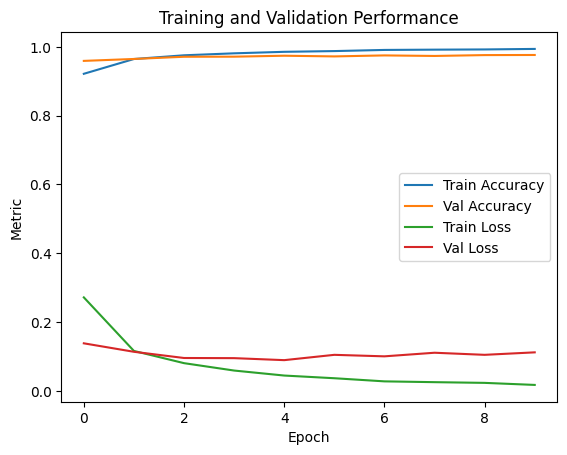

In [37]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training and Validation Performance')
plt.show()


## Adding a second hidden layer

In [60]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten 28x28 images into 784-dimensional vectors
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(X_train.shape)

#---------------------------------------------------

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)


(60000, 10)
(60000, 784)
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9157 - loss: 0.2819 - val_accuracy: 0.9564 - val_loss: 0.1467
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9650 - loss: 0.1162 - val_accuracy: 0.9691 - val_loss: 0.0992
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9754 - loss: 0.0807 - val_accuracy: 0.9733 - val_loss: 0.0879
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9809 - loss: 0.0608 - val_accuracy: 0.9714 - val_loss: 0.1009
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9839 - loss: 0.0506 - val_accuracy: 0.9697 - val_loss: 0.1099
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9871 - loss: 0.0398 - val_accuracy: 0.9678 - val_loss: 0.1174
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9887 - loss: 0.0351 - val_accuracy: 0.9737 - val_loss: 0.0999
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.9717 - loss: 0.1359
Test accuracy: 0.97


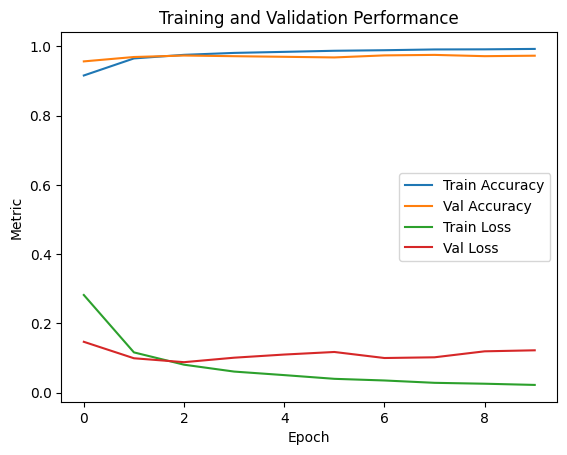

In [61]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training and Validation Performance')
plt.show()

## Modifying the network.

In [41]:
from tensorflow.keras.layers import Dropout

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten 28x28 images into 784-dimensional vectors
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(X_train.shape)


model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)


(60000, 10)
(60000, 784)
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9010 - loss: 0.3287 - val_accuracy: 0.9614 - val_loss: 0.1300
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9521 - loss: 0.1585 - val_accuracy: 0.9667 - val_loss: 0.1056
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9631 - loss: 0.1203 - val_accuracy: 0.9711 - val_loss: 0.0959
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9681 - loss: 0.1028 - val_accuracy: 0.9758 - val_loss: 0.0863
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9726 - loss: 0.0893 - val_accuracy: 0.9765 - val_loss: 0.0826
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9755 - loss: 0.0805 - val_accuracy: 0.9753 - val_loss: 0.0892
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9771 - loss: 0.0741 - val_accuracy: 0.9758 - val_loss: 0.0822
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.9786 - loss: 0.0770
Test accuracy: 0.98


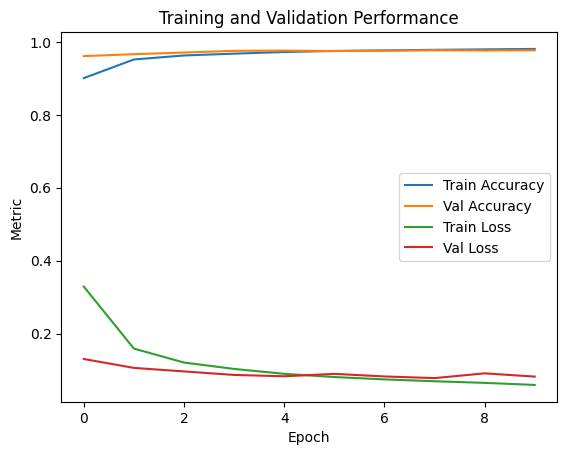

In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training and Validation Performance')
plt.show()

## change Adam optimizer, add leaky relu activation, add early stopping (when val loss stops improving)

In [45]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU


# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten 28x28 images into 784-dimensional vectors
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(X_train.shape)


model = Sequential([
    Dense(256),
    Dropout(0.3),
    LeakyReLU(alpha=0.1),
    Dense(128),
    Dropout(0.3),
    LeakyReLU(alpha=0.1),
    Dense(10, activation='softmax')
])


optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, 
                    y_train, 
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2, 
                    callbacks=[early_stop])   # added early stopping


(60000, 10)
(60000, 784)
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8835 - loss: 0.3915 - val_accuracy: 0.9539 - val_loss: 0.1578
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9459 - loss: 0.1826 - val_accuracy: 0.9627 - val_loss: 0.1219
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9580 - loss: 0.1395 - val_accuracy: 0.9689 - val_loss: 0.1048
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9645 - loss: 0.1161 - val_accuracy: 0.9724 - val_loss: 0.0877
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9698 - loss: 0.0991 - val_accuracy: 0.9739 - val_loss: 0.0877
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9719 - loss: 0.0896 - val_accuracy: 0.9747 - val_loss: 0.0879
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9747 - loss: 0.0797 - val_accuracy: 0.9759 - val_loss: 0.0863
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.9797 - loss: 0.0699
Test accuracy: 0.98


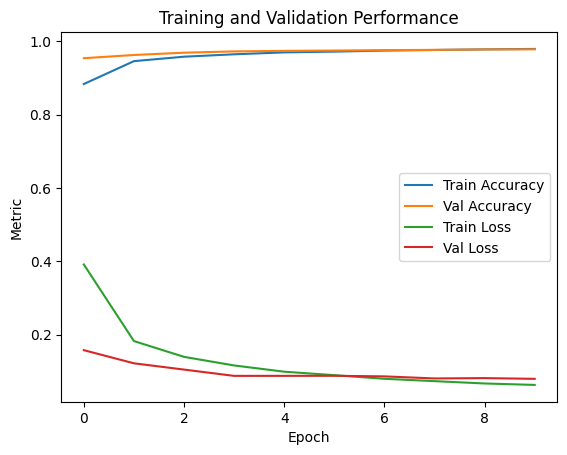

In [46]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training and Validation Performance')
plt.show()

## Visualize the Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


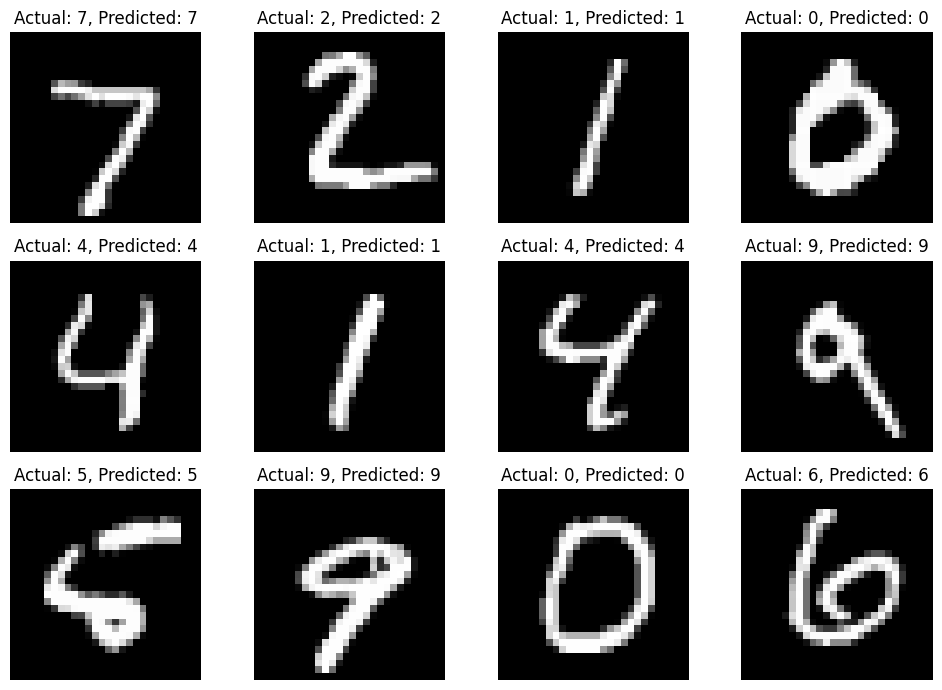

In [53]:
cols = 4
rows = 3
num = rows*cols

# Get predictions
predictions = model.predict(X_test[:num])  # shape: (6, 10)
predicted_labels = predictions.argmax(axis=1)

# Plot the images with actual and predicted labels
fig, axes = plt.subplots(rows, cols, figsize=(10, 7))
axes = axes.flatten()
for i in range(num):
    img = X_test[i].reshape(28, 28)  # reshape from 784 to 28x28
    ax = axes[i]
    ax.imshow(img, cmap="gray")
    ax.set_title(
        f"Actual: {np.argmax(y_test[i])}, "
        f"Predicted: {predicted_labels[i]}"
    )
    ax.axis("off")

plt.tight_layout()
plt.show()


### Missclassified digits

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step


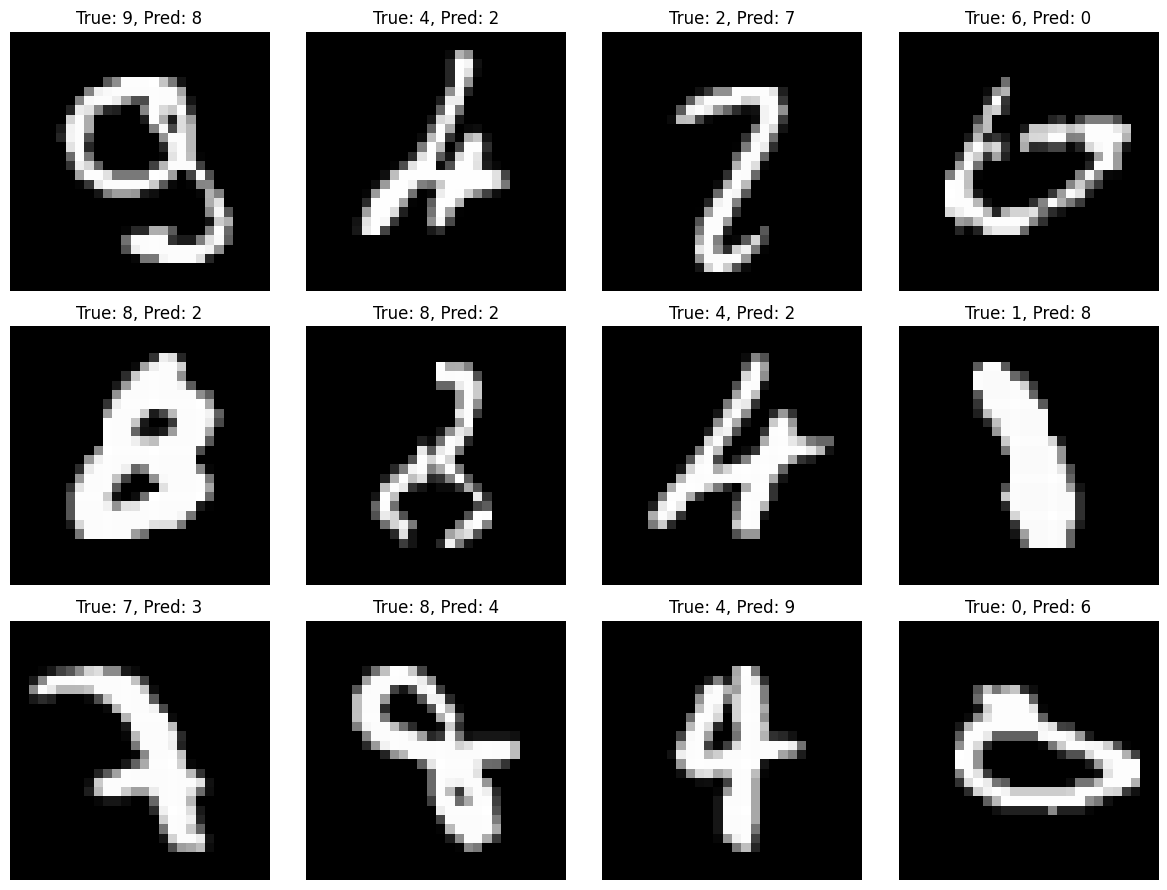

In [ ]:

# Get predicted labels
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)

# Convert one-hot y_test back to integers
true_labels = y_test.argmax(axis=1)

# Find misclassified indices
misclassified_indices = np.where(predicted_labels != true_labels)[0]

# Select first 12 misclassified examples
selected_indices = misclassified_indices[:12]

# Plot 12 misclassified digits
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()

for i, idx in enumerate(selected_indices):
    img = X_test[idx].reshape(28, 28)
    ax = axes[i]
    ax.imshow(img, cmap="gray")
    ax.set_title(
        f"True: {true_labels[idx]}, Pred: {predicted_labels[idx]}"
    )
    ax.axis("off")

plt.tight_layout()
plt.show()


# 07.04. - Deep Learning with Convolutional Neural Networks (CNN)

In [62]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(X_train.shape)

(50000, 10)
(50000, 32, 32, 3)


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/Users/johannes/miniforge3/envs/damin2025/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.5281 - loss: 1.3234 - val_accuracy: 0.5735 - val_loss: 1.2075
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6094 - loss: 1.1127 - val_accuracy: 0.6199 - val_loss: 1.0926
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6524 - loss: 0.9958 - val_accuracy: 0.6198 - val_loss: 1.0932
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.6826 - loss: 0.9109 - val_accuracy: 0.6602 - val_loss: 0.9806
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7057 - loss: 0.8427 - val_accuracy: 0.6580 - val_loss: 1.0116
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7307 - loss: 0.7702 - val_accuracy: 0.6899 - val_loss: 0.9235
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7560 - loss: 0.7017 - val_accuracy: 0.6895 - val_loss: 0.9421
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7757 - loss: 0.6456 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7125 - loss: 0.8842
Test accuracy: 0.71


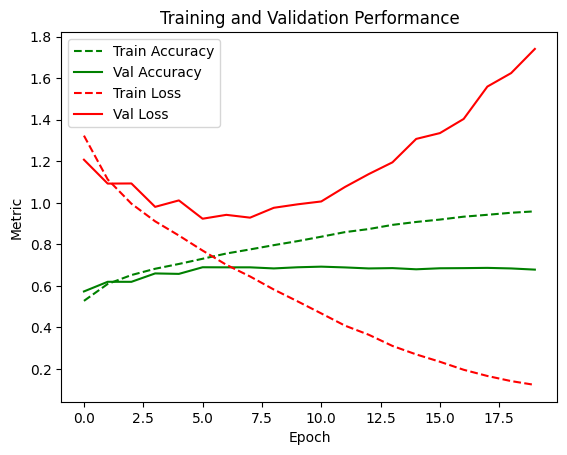

In [70]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy', c='g', ls='--')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', c='g')
plt.plot(history.history['loss'], label='Train Loss', c='r', ls='--')
plt.plot(history.history['val_loss'], label='Val Loss', c='r')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training and Validation Performance')
plt.show()


## Use data augmentation (rotation, fllipping, ...)

In [75]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train.shape)
print(X_train.shape)


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(X_train)

batch_size = 64
epochs = 20

# history = model.fit(
#     datagen.flow(X_train, y_train, batch_size=batch_size),
#     epochs=epochs,
#     validation_data=(X_test, y_test)
# )

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)


(50000, 10)
(50000, 32, 32, 3)
Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.7493 - loss: 0.7167 - val_accuracy: 0.7494 - val_loss: 0.7343
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7520 - loss: 0.7153 - val_accuracy: 0.7484 - val_loss: 0.7660
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.7548 - loss: 0.7000 - val_accuracy: 0.7681 - val_loss: 0.6906
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.7590 - loss: 0.6910 - val_accuracy: 0.7603 - val_loss: 0.7170
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7570 - loss: 0.6938 - val_accuracy: 0.7325 - val_loss: 0.8161
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.7631 - loss: 0.6786 - val_accuracy: 0.7636 - val_loss: 0.7051


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7681 - loss: 0.6906
Test accuracy: 0.77


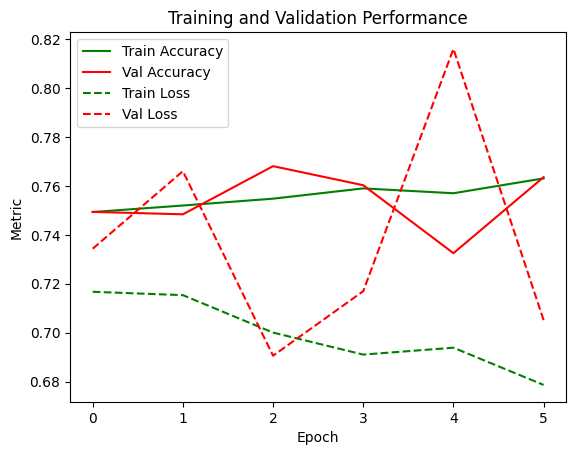

In [76]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.2f}")

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy', c='g')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', c='r')
plt.plot(history.history['loss'], label='Train Loss', c='g', ls='--')
plt.plot(history.history['val_loss'], label='Val Loss', c='r', ls='--')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Training and Validation Performance')
plt.show()


# 07.05. - Introduction to PyTorch and PyTorch Lightning

In [77]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Normalize and convert to tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load Fashion MNIST
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)


100%|██████████| 26.4M/26.4M [00:01<00:00, 16.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 866kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.61MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.6MB/s]


In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [79]:
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


In [80]:
import pytorch_lightning as pl

class LitNN(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = SimpleNN()
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self(images)
        loss = self.criterion(outputs, labels)
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        self.log('train_loss', loss)
        self.log('train_acc', acc)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)


In [81]:
from pytorch_lightning import Trainer
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
model = LitNN()
trainer = Trainer(max_epochs=10)
trainer.fit(model, train_loader)


💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleNN         | 101 K  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode
/Users/johannes/miniforge3/envs/damin2025/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` a

Epoch 9: 100%|██████████| 938/938 [00:08<00:00, 110.15it/s, v_num=0]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 938/938 [00:08<00:00, 110.05it/s, v_num=0]


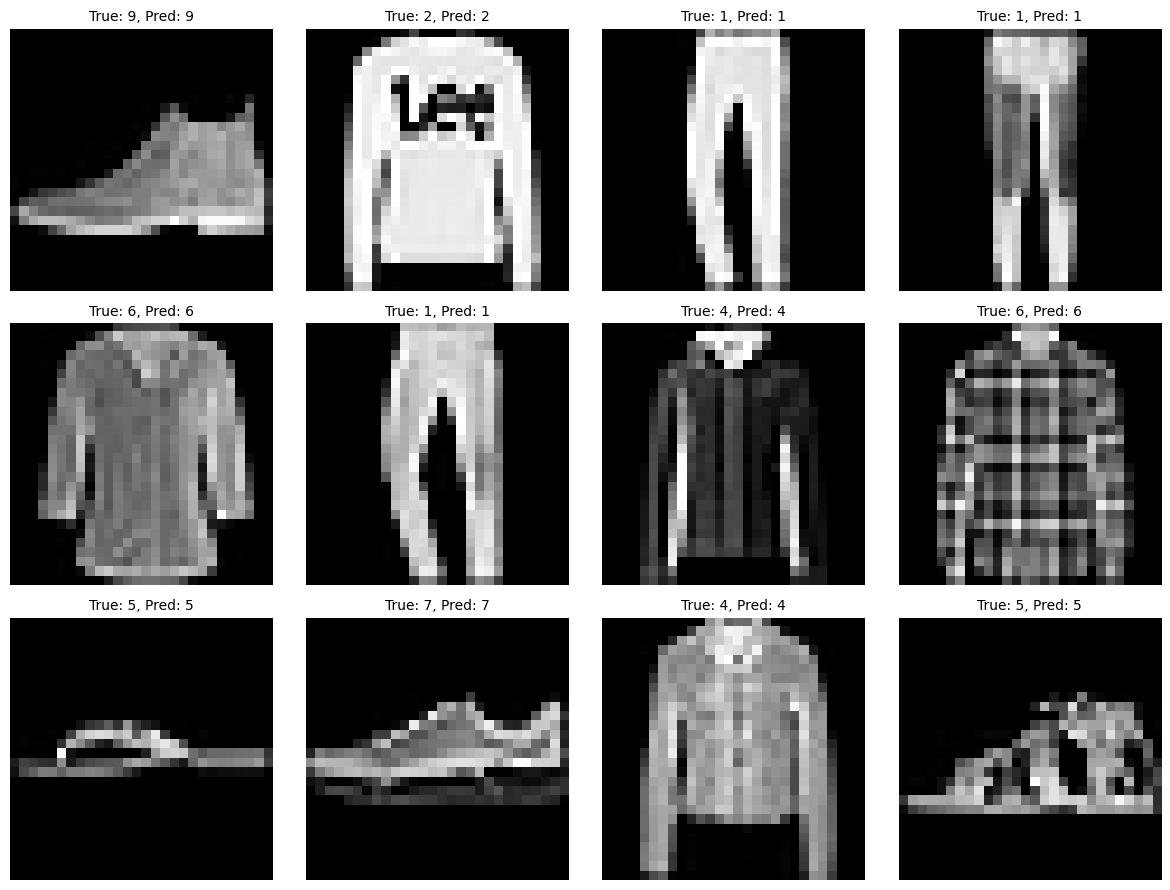

In [82]:
import matplotlib.pyplot as plt
import torch

# Put model in eval mode
model.eval()

# Get a batch of test images
test_iter = iter(test_loader)
images, labels = next(test_iter)

# Get predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Plot 12 images with predictions
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()

for i in range(12):
    img = images[i].squeeze().numpy()
    ax = axes[i]
    ax.imshow(img, cmap="gray")
    ax.set_title(
        f"True: {labels[i].item()}, Pred: {predicted[i].item()}",
        fontsize=10
    )
    ax.axis("off")

plt.tight_layout()
plt.show()


## Now with plotting validation losses and so on:

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores

  | Name      | Type             | Params | Mode 
-------------------------------------------------------
0 | model     | SimpleNN         | 101 K  | train
1 | criterion | CrossEntropyLoss | 0      | train
-------------------------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)
4         Modules in train mode
0         Modules in eval mode


/Users/johannes/miniforge3/envs/damin2025/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.


Epoch 9: 100%|██████████| 938/938 [00:09<00:00, 96.38it/s, v_num=1, val_loss=0.361] 

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 938/938 [00:09<00:00, 96.27it/s, v_num=1, val_loss=0.361]


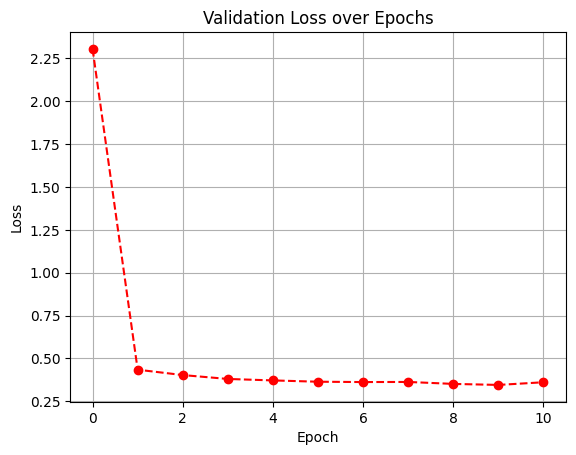

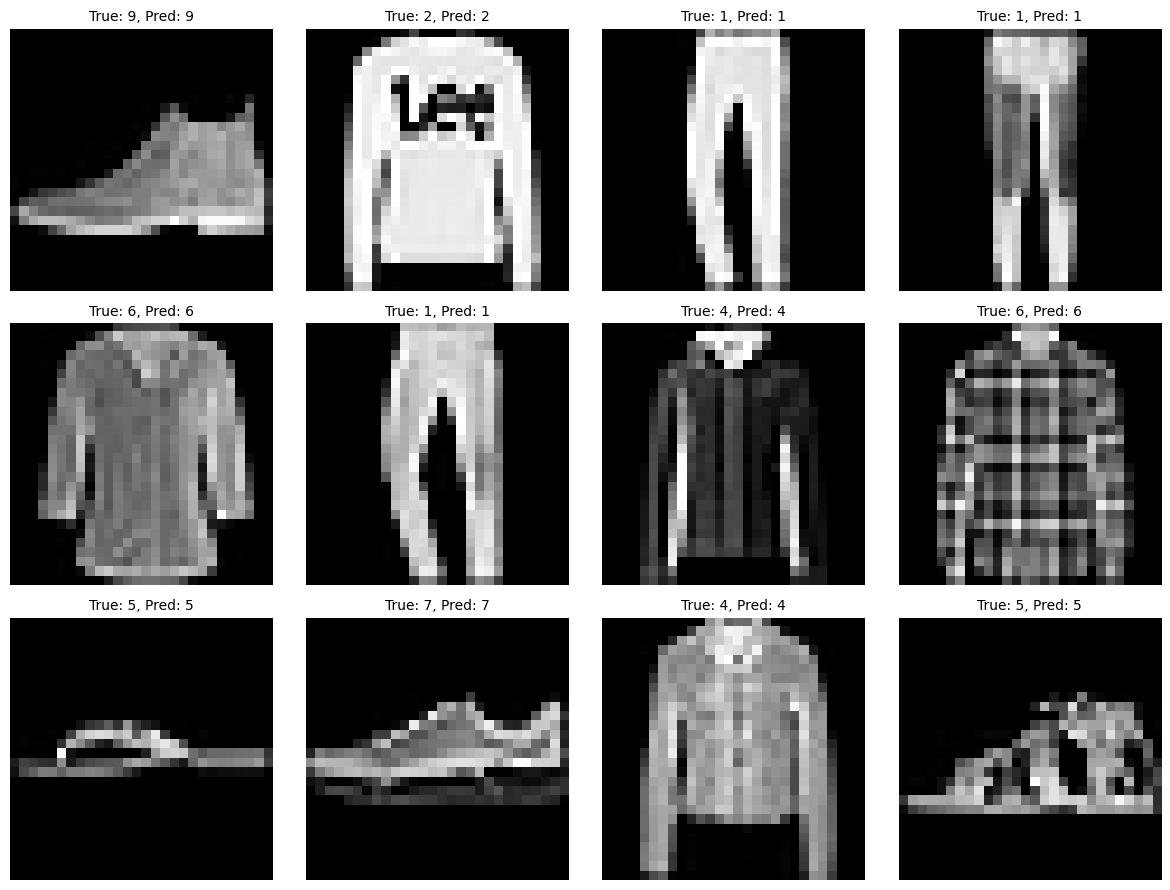

In [83]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import pytorch_lightning as pl
import matplotlib.pyplot as plt

# 1. Data loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
val_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

# 2. PyTorch model
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

# 3. Lightning module
class LitNN(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = SimpleNN()
        self.criterion = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self(images)
        loss = self.criterion(outputs, labels)
        acc = (outputs.argmax(dim=1) == labels).float().mean()
        self.log('train_loss', loss)
        self.log('train_acc', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        outputs = self(images)
        loss = self.criterion(outputs, labels)
        self.log('val_loss', loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

# 4. Callback to track val loss
class ValLossTracker(pl.Callback):
    def __init__(self):
        self.val_losses = []

    def on_validation_epoch_end(self, trainer, pl_module):
        val_loss = trainer.callback_metrics.get('val_loss')
        if val_loss is not None:
            self.val_losses.append(val_loss.cpu().item())

# 5. Train the model
val_tracker = ValLossTracker()
model = LitNN()
trainer = pl.Trainer(max_epochs=10, callbacks=[val_tracker])
trainer.fit(model, train_loader, val_loader)

# 6. Plot validation loss
plt.plot(val_tracker.val_losses, linestyle='--', marker='o', color='red')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 7. Visualize predictions
model.eval()
with torch.no_grad():
    images, labels = next(iter(val_loader))
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes = axes.flatten()
for i in range(12):
    img = images[i].squeeze().numpy()
    ax = axes[i]
    ax.imshow(img, cmap="gray")
    ax.set_title(f"True: {labels[i].item()}, Pred: {predicted[i].item()}", fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()


## Confusion matrix

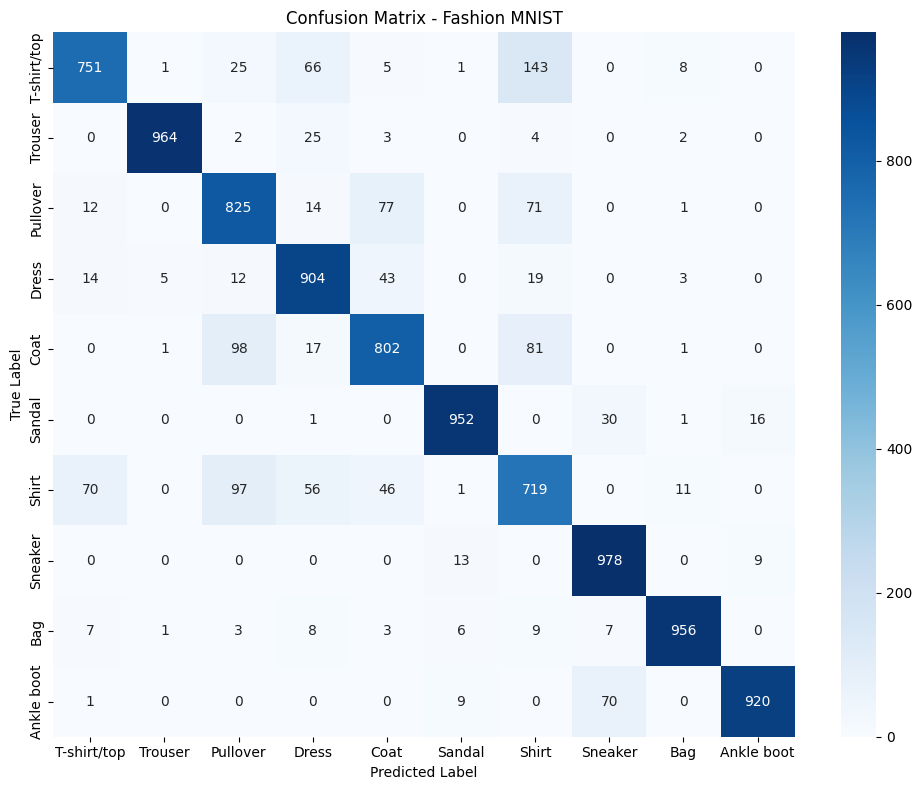

In [84]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Put model in eval mode
model.eval()

# Collect all predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Class names for Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Fashion MNIST")
plt.tight_layout()
plt.show()
